# 이벤트 패턴, 옵저버 패턴, 노티파이어 패턴

event -> listener(or subscriber) -> event handle

In [2]:
class Event:
    pass

class EventEmitter:
    def __init__(self):
        self.listeners = []

    def add_listener(self, listener):
        self.listeners.append(listener)

    def remove_listener(self, listener):
        if listener in self.listeners:
            self.listeners.remove(listener)
            return

    def emit_event(self, event):
        for listener in self.listeners:
            listener.handle_event(event)


class EventListener:
    def handle_event(self, event):
        if event.type == 'character_die':
            print("your died")

        elif event.type == 'character_attaced':
            print("you being attacked")

        return


In [4]:
# 캐릭터가 죽으면 인벤토리를 비우고, 세이브로드를 비워버리는 이벤트 기반 시스템

class Inventory:
    def clear(self):
        print("Inventory cleared.")
    def listen(self, event:str):
        if event == 'character_died':
            self.clear()
        elif event == 'item_get':
            self.add_item()
    def add_item(self):
        print("item added.")

class SaveDataManager:
    def clear(self):
        # doto..
        print("Save data cleared.")
    def listen(self, event:str):
        if event == 'character_died':
            self.clear()

class Character:
    def __init__(self):
        self.listeners = []
    def add_listener(self, listener):
        self.listeners.append(listener)
    def remove_listener(self, listener):
        if listener in self.listeners:
            self.listeners.remove(listener)
            return
    def emit_event(self, event:str):
        for listener in self.listeners:
            listener.listen(event)
    def die(self):
        self.emit_event('character_died')
    def get_item(self):
        self.emit_event('item_get')

inven = Inventory()
slmng = SaveDataManager()

cha = Character()
cha.add_listener(inven)
cha.add_listener(slmng)

In [5]:
cha.get_item()

item added.


In [6]:
cha.die()

Inventory cleared.
Save data cleared.


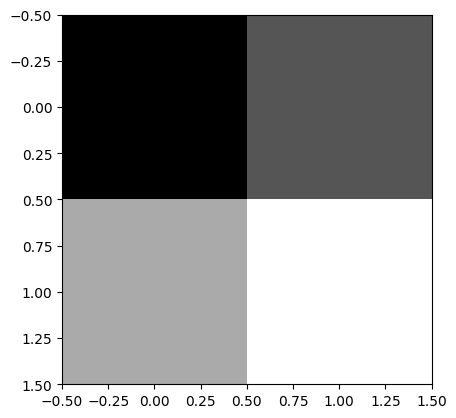

In [7]:
import matplotlib.pyplot as plt

plt.imshow([[1, 2], [3, 4]], cmap='gray')